# <center>Laboratorium 8: wartości własne</center>

In [110]:
import main
import numpy as np
import scipy
from scipy.interpolate import splprep, splev
import matplotlib
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate

***Zadanie 1***   

Wykorzystując funkcję *random_matrix_by_egval* wygenerować losowe macierze dla zadanych zestawów wartości własnych:

$\lambda_{1} = \{ 0 , 1 , 2 , ... , 20 \}$

$\lambda_{2} = \{ 10^{-10} , 10^{-9} , ... , 10^{-1} , 1 \}$

$\lambda_{3} = \{ j , -j , 1+j , 1-j \}$

Następnie dla wygenerowanych macierzy oblicz wartości własne za pomocą funkcji *eigvals* i wyrysuj je na wykresie.

[Text(0.5, 1.0, '$\\lambda_{3} = \\{ j , -j , 1+j , 1-j \\}$'),
 Text(0.5, 0, 'Re{$\\lambda$}'),
 Text(0, 0.5, 'Im{$\\lambda$}')]

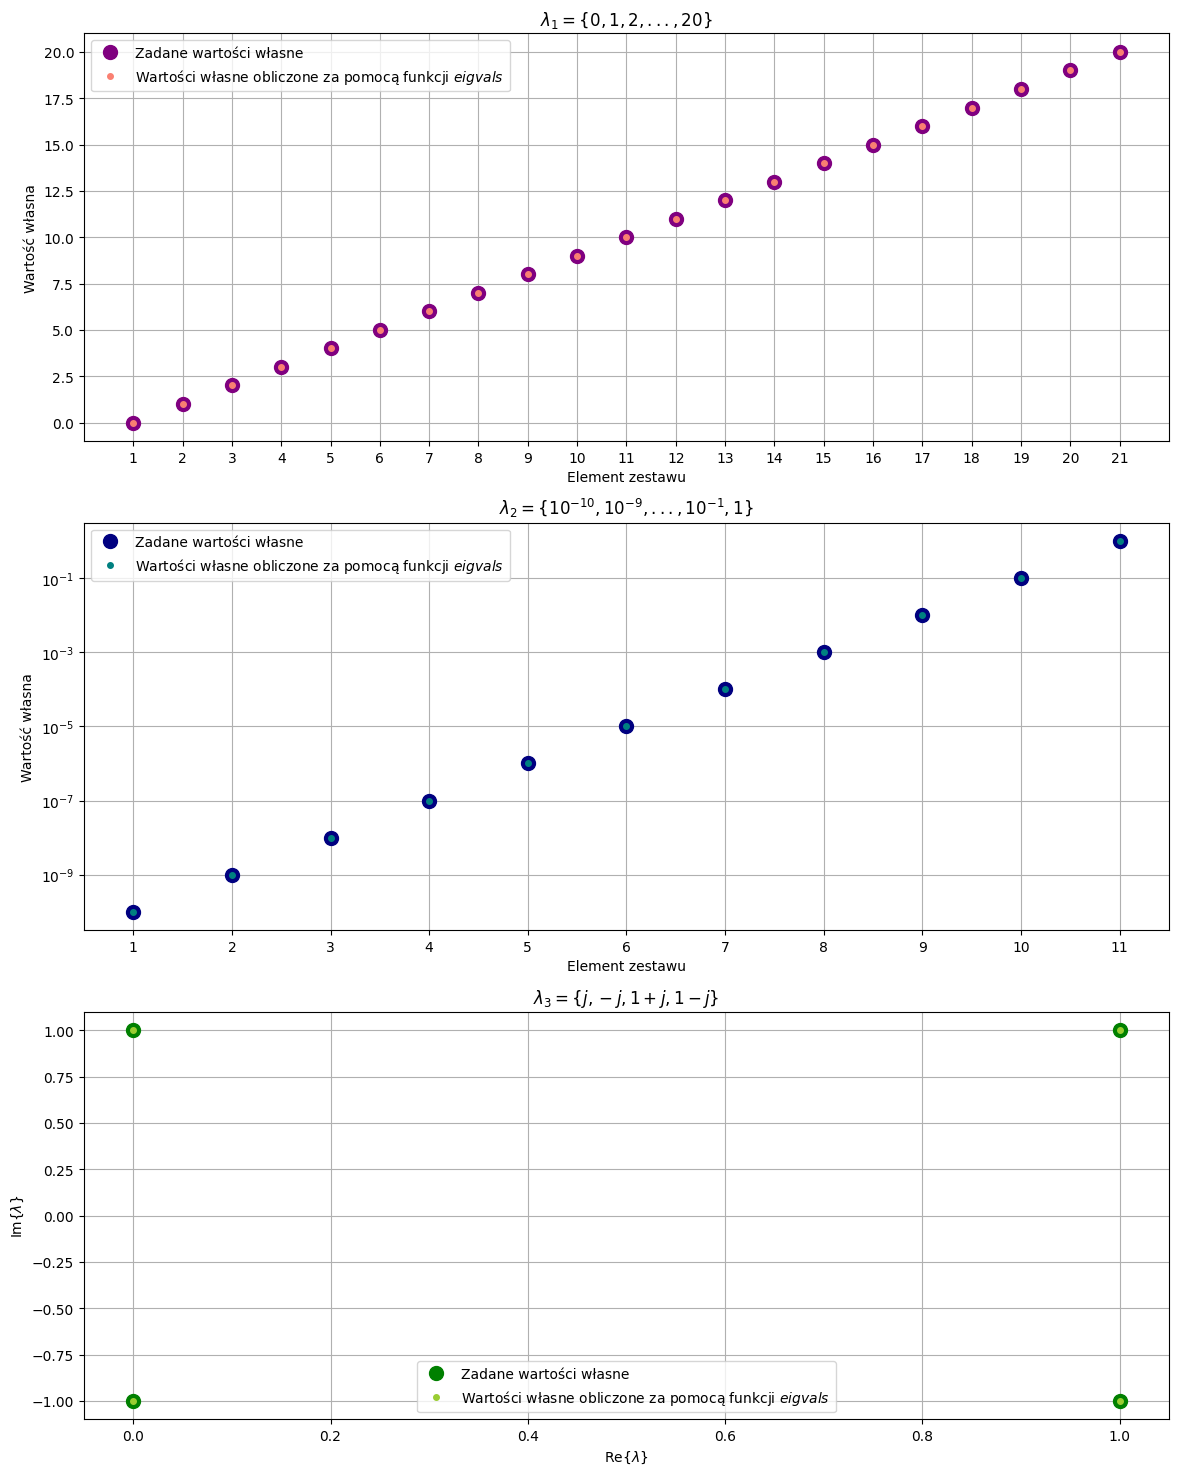

In [116]:
lambda1 = np.arange(0, 21, 1)
lambda2 = np.logspace(-10,0, 11)
lambda3 = np.array([1j, -1j, 1+1j, 1-1j])

A1 = main.random_matrix_by_egval(lambda1)
A2 = main.random_matrix_by_egval(lambda2)
A3 = main.random_matrix_by_egval(lambda3)

lambda1_res = np.sort(np.linalg.eigvals(A1))
lambda2_res = np.sort(np.linalg.eigvals(A2))
lambda3_res = np.sort(np.linalg.eigvals(A3))

labels1 = [str(el) for el in range(1, len(lambda1) + 1)] 
labels2 = [str(el) for el in range(1, len(lambda2) + 1)] 
labels3 = [str(el) for el in range(1, len(lambda3) + 1)] 

_, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18))
ax1.plot(labels1, lambda1, 'o', markersize= 10, color= 'purple', label='Zadane wartości własne')
ax1.plot(labels1, lambda1_res, 'o',markersize= 4, color= 'salmon', label= 'Wartości własne obliczone za pomocą funkcji $eigvals$')
ax1.grid()
ax1.legend()
ax1.set(title= '$\lambda_{1} = \{ 0 , 1 , 2 , ... , 20 \}$', xlabel= 'Element zestawu', ylabel= 'Wartość własna')

ax2.plot(labels2, lambda2, 'o', markersize= 10, color= 'navy', label='Zadane wartości własne')
ax2.plot(labels2, lambda2_res, 'o',markersize= 4, color= 'teal', label= 'Wartości własne obliczone za pomocą funkcji $eigvals$')
ax2.grid()
ax2.legend()
ax2.semilogy()
ax2.set(title= '$\lambda_{2} = \{ 10^{-10} , 10^{-9} , ... , 10^{-1} , 1 \}$', xlabel= 'Element zestawu', ylabel= 'Wartość własna')

ax3.plot(np.real(lambda3), np.imag(lambda3), 'o', markersize= 10, color= 'green', label='Zadane wartości własne')
ax3.plot(np.real(lambda3_res), np.imag(lambda3_res), 'o',markersize= 4, color= 'yellowgreen', label= 'Wartości własne obliczone za pomocą funkcji $eigvals$')
ax3.grid()
ax3.legend()
ax3.set(title= '$\lambda_{3} = \{ j , -j , 1+j , 1-j \}$', xlabel= 'Re{$\lambda$}', ylabel= 'Im{$\lambda$}')

***Wnioski:***

W zadaniu pierwszym wykorzystałam zaimplementowaną wcześniej funkcję *random_matrix_by_egval*. Wykorzystuje ona fakt, że dla każdej macierzy nieosobliwej $P$  wartości własne macierzy $A$ oraz $PAP^{-1}$ są sobie równe. Dzięki temu mogliśmy sprawdzić poprawność działania wbudowanej funkcji *eigvals*. Powyższe wykresy potwierdzają skuteczność obliczania wartości własnych tym sposobem. 

***Zadanie 2***   

Wykorzystując zestawy wartości własnych z zadania pierwszego wygeneruj macierze funkcją *random_matrix_by_egval* (lub uzyj wygenerowanych wcześniej macierzy). 

Następnie do otrzymanych wyników dodaj macierz $B$, gdzie $B = \alpha I$, przy czym $\alpha$ równa się ilości liter w Twoim nazwisku.

Wypisz wartości własne otrzymanej w ten sposób macierzy. Porównaj je z pierwotnie wykorzystanymi.

[Text(0.5, 1.0, '$\\lambda_{3} = \\{ j , -j , 1+j , 1-j \\}$'),
 Text(0.5, 0, 'Re{$\\lambda$}'),
 Text(0, 0.5, 'Im{$\\lambda$}')]

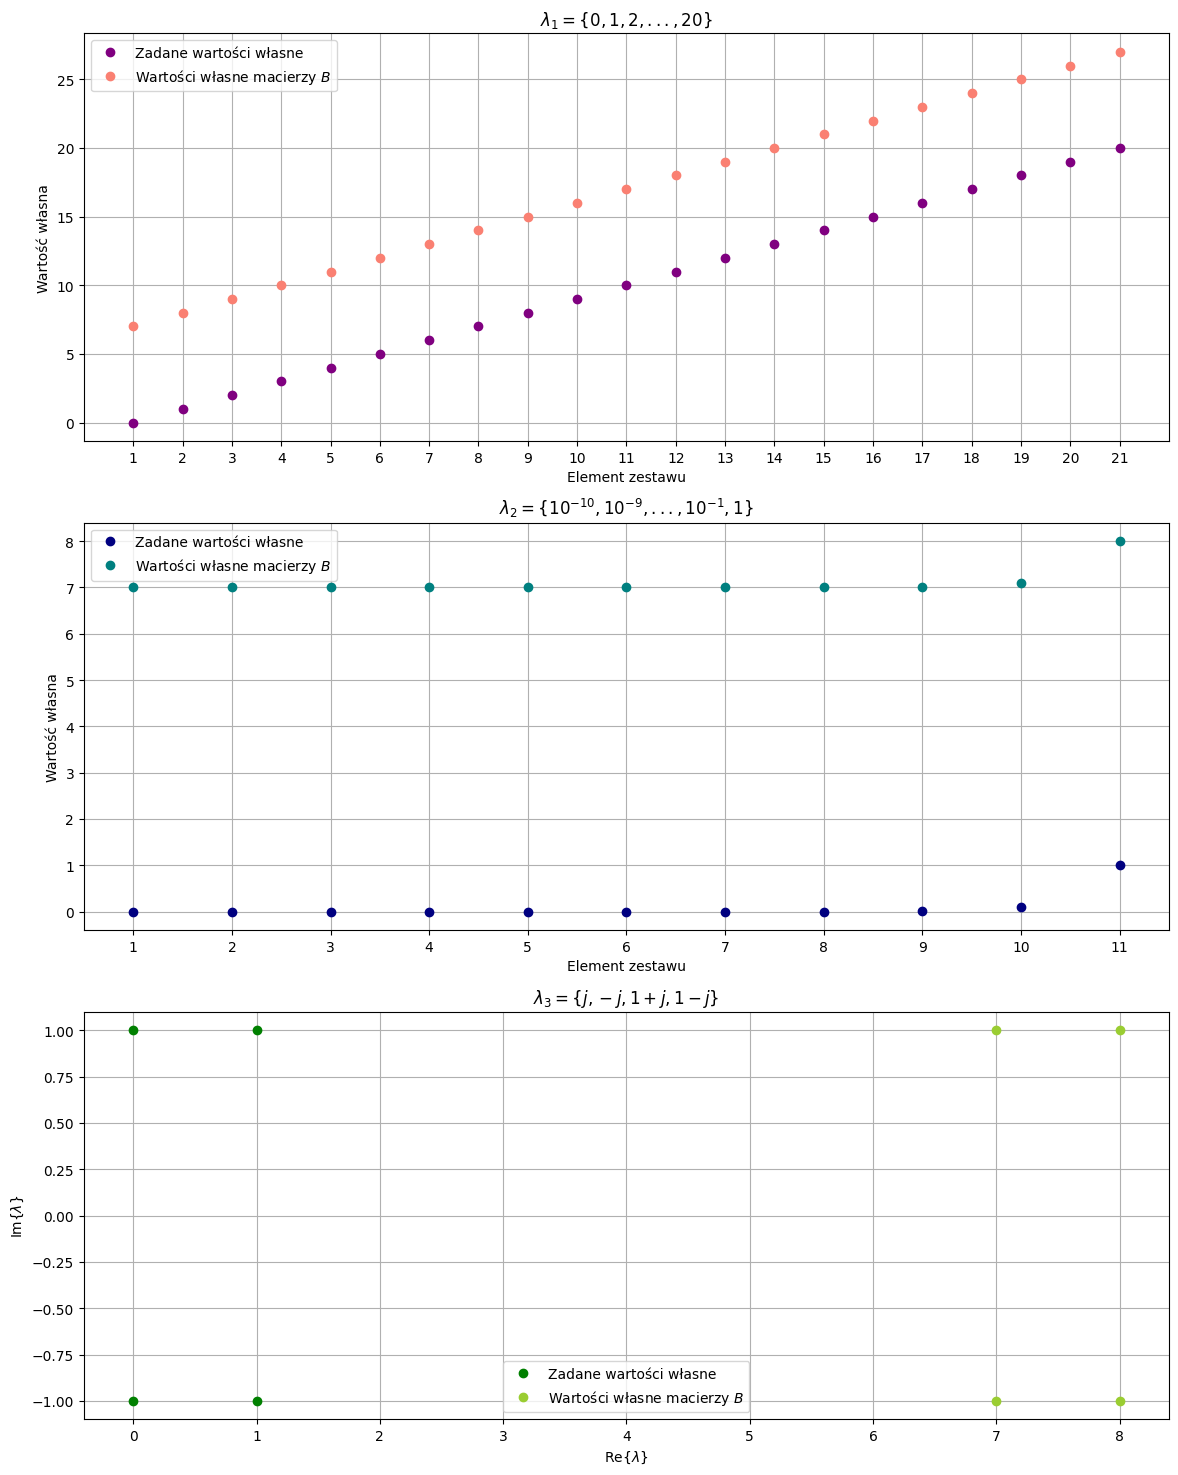

In [112]:
alfa = len('Wyderka')

A1 = main.random_matrix_by_egval(lambda1)
A2 = main.random_matrix_by_egval(lambda2)
A3 = main.random_matrix_by_egval(lambda3)

A1 = A1 + alfa*np.eye(A1.shape[0])
A2 = A2 + alfa*np.eye(A2.shape[0])
A3 = A3 + alfa*np.eye(A3.shape[0])

lambda1_res = np.sort(np.linalg.eigvals(A1))
lambda2_res = np.sort(np.linalg.eigvals(A2))
lambda3_res = np.sort(np.linalg.eigvals(A3))

labels1 = [str(el) for el in range(1, len(lambda1) + 1)] 
labels2 = [str(el) for el in range(1, len(lambda2) + 1)] 
labels3 = [str(el) for el in range(1, len(lambda3) + 1)] 

_, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 18))
ax1.plot(labels1, lambda1, 'o',  color= 'purple', label='Zadane wartości własne')
ax1.plot(labels1, lambda1_res, 'o', color= 'salmon', label= 'Wartości własne macierzy $B$' )
ax1.grid()
ax1.legend()
ax1.set(title= '$\lambda_{1} = \{ 0 , 1 , 2 , ... , 20 \}$', xlabel= 'Element zestawu', ylabel= 'Wartość własna')

ax2.plot(labels2, lambda2, 'o',  color= 'navy', label='Zadane wartości własne')
ax2.plot(labels2, lambda2_res, 'o', color= 'teal',  label= 'Wartości własne macierzy $B$' )
ax2.grid()
ax2.legend()
ax2.set(title= '$\lambda_{2} = \{ 10^{-10} , 10^{-9} , ... , 10^{-1} , 1 \}$', xlabel= 'Element zestawu', ylabel= 'Wartość własna')

ax3.plot(np.real(lambda3), np.imag(lambda3), 'o', color= 'green', label= 'Zadane wartości własne')
ax3.plot(np.real(lambda3_res), np.imag(lambda3_res), 'o', color= 'yellowgreen', label= 'Wartości własne macierzy $B$')
ax3.grid()
ax3.legend()
ax3.set(title= '$\lambda_{3} = \{ j , -j , 1+j , 1-j \}$', xlabel= 'Re{$\lambda$}', ylabel= 'Im{$\lambda$}')

***Wnioski:***

Dzięki realizacji powyższego zadania mogliśmy zaobserwować, jak zmiana macierzy wpływa na jej wartości własne. Dodanie do macierzy przeskalowanej macierzy jednostkowej skutkuje przesunięciem części rzeczywistych wartości własnych o $\alpha$ jednostek, gdzie $\alpha$ stanowi współczynnik skalowania macierzy jednostkowej.

***Zadanie 3***   

Dokonaj analizy wrazliwości na zaburzenia ze wzgledu na uzywaną formę reprezentacji. Wykorzystaj do tego następujący zestaw wartości własnych: $\lambda = \{ 0 , 1 , 2 , ... , 20 \}$

1) Zaimplementuj funkcję *polly_from_egval* przekształcająca podane wartości własne, na wielomian charakterystyczny. W kolejnym kroku wykorzystaj zaimplementowana wczesniej funkcje *frob_a* do przejścia z postaci wielomiano charakterystycznego na macierz Frobeniusa. W ostatnim kroku oblicz wartości własne ostatecznej macierzy i wyrysuj jest na wykresie (w postaci kółek).

2) Kolejno powtórz czynności punktu pierwszego, dodając zaburzenia współczynników wielomianu charakterystycznego poprzez dodanie losowej wartości postaci $(10^{-10})N(0,1)$, przed przekształceniem na macierz Frobeiusa. Wartości własne narysuj na tym samym wykresie co uprzednie (w postaci krzyzyków)

3) Zaimplementuj funkcję przekształcająca podane wartości własne, na losową macierz (wykorzystaj zaimplementowana wczesniej funkcje *random_matrix_by_egval*). Potem oblicz wartości własne ostatecznej macierzy i wyrysuj jest na nowym wykresie (w postaci kółek).

4) Kolejno powtórz czynności punktu trzeciego, dodając zaburzenia do wygenerowanej (tej samej!) macierzy poprzez dodanie do niej macierzy $R$, gdzie kazda z jej wartości jest postaci $(10^{-10})N(0,1)$. Oblicz wartości własnej nowej macierzy i narysuj je na tym samym wykresie co uprzednie (w postaci krzyzyków)

Text(0.5, 0.98, 'Analiza wrażliwości na zaburzenia')

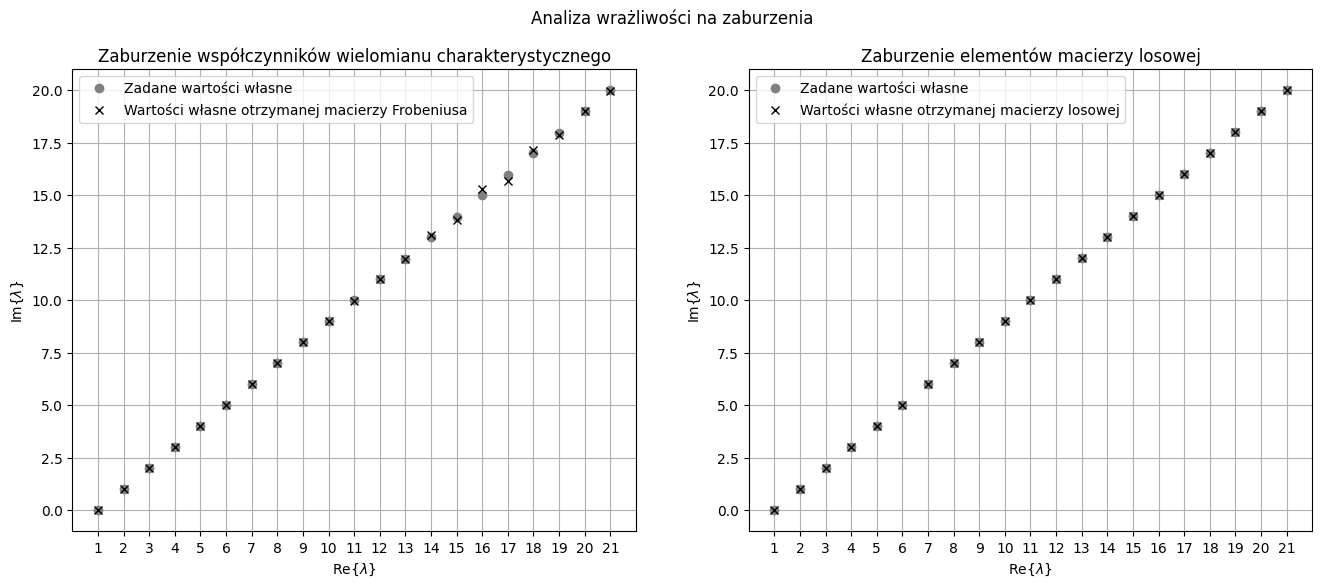

In [119]:
# 1
_, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 6))
polly1 = main.polly_from_egval(lambda1)
frob1 = main.frob_a(polly1[1:])
lambda1_res = np.sort(np.linalg.eigvals(frob1))
labels1 = [str(el) for el in range(1, len(lambda1_res) + 1)] 
ax1.plot(labels1, np.real(lambda1_res), 'o', color = 'gray', label= 'Zadane wartości własne')

# 2
polly2 = main.polly_from_egval(lambda1) + 10**(-10)* np.random.normal()
frob2 = main.frob_a(polly2[1:])
lambda2_res = np.sort(np.linalg.eigvals(frob2))
labels2 = [str(el) for el in range(1, len(lambda2_res) + 1)] 
ax1.plot(labels1, np.real(lambda2_res), 'x', color= 'black', label= 'Wartości własne otrzymanej macierzy Frobeniusa')
ax1.grid()
ax1.legend()
ax1.set(xlabel= 'Re{$\lambda$}', ylabel='Im{$\lambda$}', title= 'Zaburzenie współczynników wielomianu charakterystycznego')

# 3
matrix = main.random_matrix_by_egval(lambda1)
lambda3_res = np.sort(np.linalg.eigvals(matrix))
labels1 = [str(el) for el in range(1, len(lambda3_res) + 1)] 
ax2.plot(labels1, np.real(lambda3_res),'o', color = 'gray', label= 'Zadane wartości własne')

# 4
R = np.ones(matrix.shape) * (10**(-10)*np.random.normal())
matrix = matrix + R
lambda4_res = np.sort(np.linalg.eigvals(matrix))
labels4 = [str(el) for el in range(1, len(lambda4_res) + 1)] 
ax2.plot(labels1, np.real(lambda4_res), 'x', color= 'black', label= 'Wartości własne otrzymanej macierzy losowej')
ax2.grid()
ax2.legend()
ax2.set(xlabel= 'Re{$\lambda$}', ylabel='Im{$\lambda$}', title= 'Zaburzenie elementów macierzy losowej')

plt.suptitle('Analiza wrażliwości na zaburzenia')

***Wnioski:***

W zadaniu trzecim naszym celem było przeanalizowanie wrażliwości na zaburzenia w zależności od wybranej reprezentacji. Na podstawie powyższych wykresów można zauważyć, że drobne zaburzenia wielomianu charakterystycznego widocznie wpływają na część wartości własnych macierzy. Otrzymane wartości własne macierzy Frobeniusa nie pokrywają się całkowicie z tymi zadanymi. W przypadku wykorzystania zaburzonej macierzy losowej zmiany nie są zauważalne. Jest to zatem metoda mniej wrażliwa na niewielkie zmiany.

***Zadanie 4***   

Dokonaj analizy dla zestawu wartości własnych: $\lambda = \{ 1 - 10^{-K}, K = 0,1,2,...,20 \}$. na dwa sposoby:

1) Poprzez utworzenie losowej macierzy, obliczenie wartości własnych, a następnie ich wyrysowania.
2) Poprzez obliczenie pierwiatków wielomianu charakterystycznego, a następnie ich wyrysowania.

Wykorzystaj wcześniej zaimplementowane funkcje.

Text(0.5, 0.98, 'Analiza wartości własnych  $\\lambda = \\{ 1 - 10^{-K}, K = 0,1,2,...,20 \\}$')

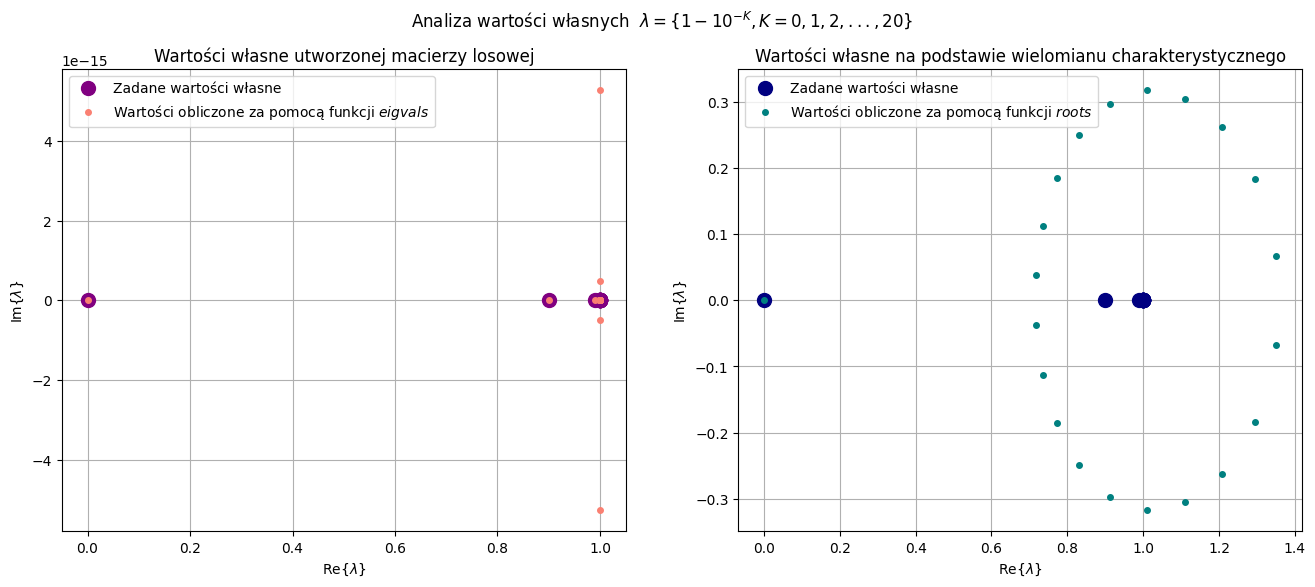

In [123]:
lambda4  = [1 - 10**(-k) for k in range(0, 21)]
_, (ax1, ax2) = plt.subplots(1, 2, figsize= (16, 6))

# 1 
A = main.random_matrix_by_egval(lambda4)
lambda4_res = np.sort(np.linalg.eigvals(A))
ax1.plot(np.real(lambda4), np.imag(lambda4), 'o', markersize= 10, color= 'purple', label='Zadane wartości własne')
ax1.plot(np.real(lambda4_res), np.imag(lambda4_res), 'o',markersize= 4, color= 'salmon', label= 'Wartości obliczone za pomocą funkcji $eigvals$')
ax1.grid()
ax1.legend()
ax1.set(title= 'Wartości własne utworzonej macierzy losowej', xlabel= 'Re{$\lambda$}', ylabel='Im{$\lambda$}')

# 2
polly5 = main.polly_from_egval(lambda4)
roots = np.sort(np.roots(polly5))
ax2.plot(np.real(lambda4), np.imag(lambda4), 'o', markersize= 10, color= 'navy', label='Zadane wartości własne')
ax2.plot(np.real(roots), np.imag(roots), 'o',markersize= 4, color= 'teal', label= 'Wartości obliczone za pomocą funkcji $roots$')
ax2.grid()
ax2.legend()
ax2.set(title= 'Wartości własne na podstawie wielomianu charakterystycznego', xlabel= 'Re{$\lambda$}', ylabel='Im{$\lambda$}')

plt.suptitle('Analiza wartości własnych  $\lambda = \{ 1 - 10^{-K}, K = 0,1,2,...,20 \}$')


***Wnioski:***

W ostatnim zadaniu naszym celem była analiza zestawu wartości własnych zmieniających się na podstawie eksponenty. W tym celu wyznaczyłam wartości własne na dwa różne sposoby - z wykorzystaniem reprezentacji w postaci wielomianu charakterystycznego oraz w postaci macierzy losowej. Powyższy wykres pokazuje, że wartości własne utworzonej macierzy losowej (obliczone za pomocą funkcji *eigvals*) różnią się od zadanych wartości własnych o wielkości rzędu zbliżonego do zera maszynowego. Natomiast obliczenie pierwiastków wielomianu charakterystycznego przy pomocy funkcji *roots* przyniosło znacznie większe, zauważalne błędy. Pojawiło się wiele składowych urojonych, które ułożyły się w okrąg. 

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)